数据增强是从现 有的训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加 （augment）样本,其目标是，模型在训练时不会两次查看完全相同的图像。这让模型能够观察 到数据的更多内容，从而具有更好的泛化能力

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
# 利用 ImageDataGenerator 来设置数据增强 
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')
# rotation_range 是角度值（在 0~180 范围内），表示图像随机旋转的角度范围
# width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽 度或总高度的比例）
# shear_range 是随机错切变换的角度
# zoom_range 是图像随机缩放的范围
# horizontal_flip 是随机将一半图像水平翻转
# fill_mode是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移

In [3]:
# 图像预处理 工具的模块
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os, shutil

# 原始数据集解压目录的路径
original_dataset_dir = r'D:\project\00_source\datasets\dogs_vs_cats\train\train'
# 小数据集路径
base_dir = r'D:\project\00_source\datasets\dogs_vs_cats\small'

# 创建训练、验证、测试目录
train_dir         = os.path.join(base_dir, 'train')
validation_dir    = os.path.join(base_dir, 'validation')
test_dir          = os.path.join(base_dir, 'test')

# 创建狗训练、验证、测试目录
train_dog_dir      = os.path.join(train_dir, 'dogs')
validation_dog_dir = os.path.join(validation_dir, 'dogs')
test_dog_dir       = os.path.join(test_dir, 'dogs')

# 创建猫训练、验证、测试目录
train_cat_dir      = os.path.join(train_dir, 'cats')
validation_cat_dir = os.path.join(validation_dir, 'cats')
test_cat_dir       = os.path.join(test_dir, 'cats')

# 猫图片路径
fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]
# 选择其中一张图
img_path = fnames[3]
print(img_path)

# 读取并调整大小
img = image.load_img(img_path,target_size=(150,150))
# 将图像转换为（150，150，3）的numpy数组
x = image.img_to_array(img)
# 将其形状改为（1，150，150，3）
x = x.reshape((1,)+ x.shape)
print(x.shape)

D:\project\00_source\datasets\dogs_vs_cats\small\train\cats\cat.100.jpg
(1, 150, 150, 3)


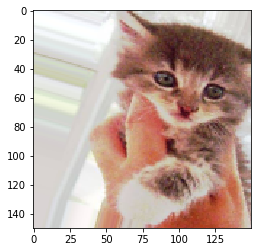

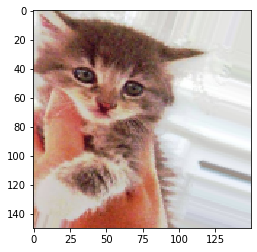

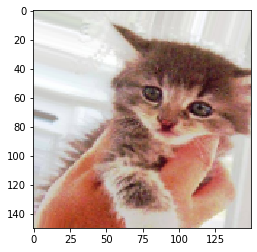

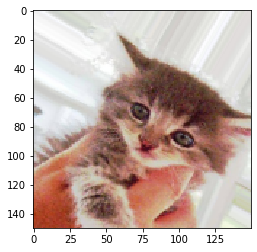

In [4]:
i = 0
for batch in datagen.flow(x,batch_size=1):
#     print(len(batch))
#     break
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

使用这种数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网 络看到的输入仍然是高度相关的，因为这些输入都来自于少量的原始图像

无法生成新信息， 而只能混合现有信息

这种方法可能不足以完全消除过拟合。为了进一步降低过拟合， 你还需要向模型中添加一个 Dropout 层，添加到密集连接分类器之前

